In [8]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [9]:
page = requests.get("https://www.cricbuzz.com/cricket-series/3130/indian-premier-league-2020/points-table")

In [10]:
soup = BeautifulSoup(page.text)

In [4]:
tbl = soup.find("table",class_='table cb-srs-pnts')

col_names = [x.get_text() for x in tbl.find_all('td',class_="cb-srs-pnts-th")]
col_names[5]='pts'
team_names = [x.get_text() for x in tbl.find_all('td',class_="cb-srs-pnts-name")]
pnt_tbl = [x.get_text() for x in tbl.find_all('td',class_="cb-srs-pnts-td")]
print(col_names)
print(team_names)
print(pnt_tbl)

['Mat', 'Won', 'Lost', 'Tied', 'NR', 'pts']
['Mumbai Indians', 'Delhi Capitals', 'Sunrisers Hyderabad', 'Royal Challengers Bengaluru', 'Kolkata Knight Riders', 'Punjab Kings', 'Chennai Super Kings', 'Rajasthan Royals']
['14', '9', '5', '0', '0', '18', '+1.107', '14', '8', '6', '0', '0', '16', '-0.109', '14', '7', '7', '0', '0', '14', '+0.608', '14', '7', '7', '0', '0', '14', '-0.172', '14', '7', '7', '0', '0', '14', '-0.214', '14', '6', '8', '0', '0', '12', '-0.162', '14', '6', '8', '0', '0', '12', '-0.455', '14', '6', '8', '0', '0', '12', '-0.569']


In [5]:
np_pnt_tbl = (np.array(pnt_tbl)).reshape(len(team_names),7)
print("after 1\n",np_pnt_tbl)
np_pnt_tbl = np.delete(np_pnt_tbl,6,1)
print("after 2\n",np_pnt_tbl)
np_pnt_tbl = np_pnt_tbl.astype(int)
print("after 3\n",np_pnt_tbl)
consol_tbl = pd.DataFrame(np_pnt_tbl,index=team_names,columns=col_names)
consol_tbl.columns.name = "Teams"
print(consol_tbl)

after 1
 [['14' '9' '5' '0' '0' '18' '+1.107']
 ['14' '8' '6' '0' '0' '16' '-0.109']
 ['14' '7' '7' '0' '0' '14' '+0.608']
 ['14' '7' '7' '0' '0' '14' '-0.172']
 ['14' '7' '7' '0' '0' '14' '-0.214']
 ['14' '6' '8' '0' '0' '12' '-0.162']
 ['14' '6' '8' '0' '0' '12' '-0.455']
 ['14' '6' '8' '0' '0' '12' '-0.569']]
after 2
 [['14' '9' '5' '0' '0' '18']
 ['14' '8' '6' '0' '0' '16']
 ['14' '7' '7' '0' '0' '14']
 ['14' '7' '7' '0' '0' '14']
 ['14' '7' '7' '0' '0' '14']
 ['14' '6' '8' '0' '0' '12']
 ['14' '6' '8' '0' '0' '12']
 ['14' '6' '8' '0' '0' '12']]
after 3
 [[14  9  5  0  0 18]
 [14  8  6  0  0 16]
 [14  7  7  0  0 14]
 [14  7  7  0  0 14]
 [14  7  7  0  0 14]
 [14  6  8  0  0 12]
 [14  6  8  0  0 12]
 [14  6  8  0  0 12]]
Teams                        Mat  Won  Lost  Tied  NR  pts
Mumbai Indians                14    9     5     0   0   18
Delhi Capitals                14    8     6     0   0   16
Sunrisers Hyderabad           14    7     7     0   0   14
Royal Challengers Bengaluru   

In [6]:
team_abr = []

for team in team_names:
    short_form = ''
    for initial in team.split(' '):
       short_form = short_form + initial[0]
    team_abr.append(short_form)
print(team_abr)

['MI', 'DC', 'SH', 'RCB', 'KKR', 'PK', 'CSK', 'RR']


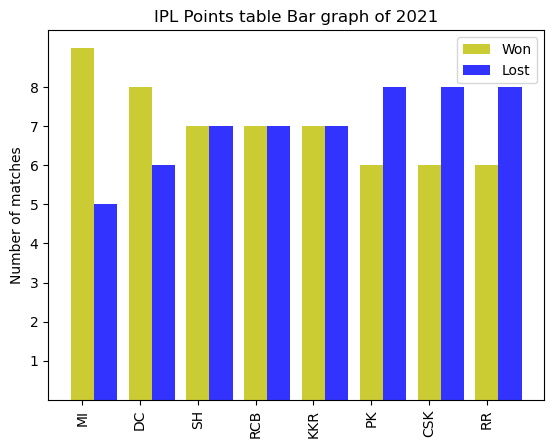

In [7]:
title = 'IPL Points table Bar graph of 2021'
val_ticks = [1,2,3,4,5,6,7,8]
lost_ticks=[1.4,2.4,3.4,4.4,5.4,6.4,7.4,8.4]

plt.bar(val_ticks,np_pnt_tbl[:,1],width=0.4,color='y',alpha=0.8,label='Won')
plt.bar(lost_ticks,np_pnt_tbl[:,2],width=0.4,color='b',alpha=0.8,label='Lost')
plt.yticks(val_ticks)
plt.ylabel("Number of matches")
plt.xticks(val_ticks,team_abr,rotation='vertical')
plt.grid(False)
plt.legend()
plt.title(title)
plt.show()